In [29]:
import pandas as pd
import numpy as np
import os, pdb, sys
from pyballmapper import BallMapper
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

df = pd.read_csv('raw_data.csv') # 2022 all counties

# Rename Columns
df.columns = ['key', 'opExp$', 'cropSales$', 'netIncome$PerOp', 'agLandAcres', 'numOperations', 
              'numOpsWithInternet', 'netIncome$', 'animalProductSales$', 'govProgramsReceipts$', 
              'commodityTotalSales$', 'numWorkersPctFarmOps', 'cccRepayments$', 'cccReceipts$']

print(df.shape)
df.head()

(3078, 14)


,key,opExp$,cropSales$,netIncome$PerOp,agLandAcres,numOperations,numOpsWithInternet,netIncome$,animalProductSales$,govProgramsReceipts$,commodityTotalSales$,numWorkersPctFarmOps,cccRepayments$,cccReceipts$
0,ALABAMA-AUTAUGA,40628000.0,29212000.0,32713.0,102162.0,353.0,263.0,9810000.0,10638000.0,98000.0,47193000.0,89.0,NaN,NaN
1,ALABAMA-BALDWIN,33779000.0,123196000.0,4108.0,48673.0,853.0,680.0,1984000.0,20489000.0,682000.0,30104000.0,18.0,0.0,1064000.0
2,ALABAMA-BARBOUR,228204000.0,23929000.0,290854.0,261740.0,590.0,367.0,108075000.0,193435000.0,3149000.0,324442000.0,79.0,0.0,NaN
3,ALABAMA-BIBB,1733000.0,2387000.0,-576.0,14300.0,176.0,144.0,-56000.0,2054000.0,0.0,1430000.0,33.0,NaN,NaN
4,ALABAMA-BLOUNT,107286000.0,18821000.0,100669.0,53290.0,980.0,785.0,58790000.0,307338000.0,17000.0,165033000.0,13.0,NaN,NaN


In [30]:
# Create subset and scale
sub = df[list(df.columns)[1:]].copy(deep = True)
scaler = MinMaxScaler()
sub_norm = scaler.fit_transform(sub)
sub_norm = pd.DataFrame(sub_norm, columns=list(df.columns)[1:])
sub_norm.head()


,opExp$,cropSales$,netIncome$PerOp,agLandAcres,numOperations,numOpsWithInternet,netIncome$,animalProductSales$,govProgramsReceipts$,commodityTotalSales$,numWorkersPctFarmOps,cccRepayments$,cccReceipts$
0,0.004455,0.005389,0.051592,0.017354,0.065893,0.070945,0.031080,0.003062,0.000911,0.004165,0.252174,NaN,NaN
1,0.003704,0.022725,0.046635,0.008268,0.159491,0.183861,0.028510,0.005897,0.006343,0.002657,0.046377,0.0,0.041183
2,0.025026,0.004414,0.096323,0.044462,0.110258,0.099106,0.063352,0.055670,0.029289,0.028633,0.223188,0.0,NaN
3,0.000190,0.000440,0.045824,0.002429,0.032759,0.038722,0.027840,0.000591,0.000000,0.000126,0.089855,NaN,NaN
4,0.011765,0.003472,0.063367,0.009052,0.183265,0.212294,0.047166,0.088451,0.000158,0.014565,0.031884,NaN,NaN


In [31]:
# Create coloring subset
coloring_subset = ['netIncome$PerOp', 'agLandAcres', 'numOperations']
coloring_df_norm = sub_norm[coloring_subset].copy(deep = True)
coloring_df_norm.head()

,netIncome$PerOp,agLandAcres,numOperations
0,0.051592,0.017354,0.065893
1,0.046635,0.008268,0.159491
2,0.096323,0.044462,0.110258
3,0.045824,0.002429,0.032759
4,0.063367,0.009052,0.183265


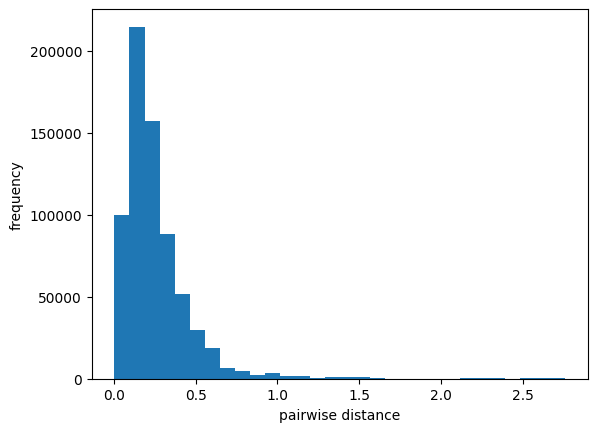

In [32]:
# Visualize Pairwise Distances
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
distances = pdist(sub_norm)
plt.hist(distances, bins = 30)
plt.xlabel('pairwise distance')
plt.ylabel('frequency')
plt.show()

# Create Ball Mapper

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


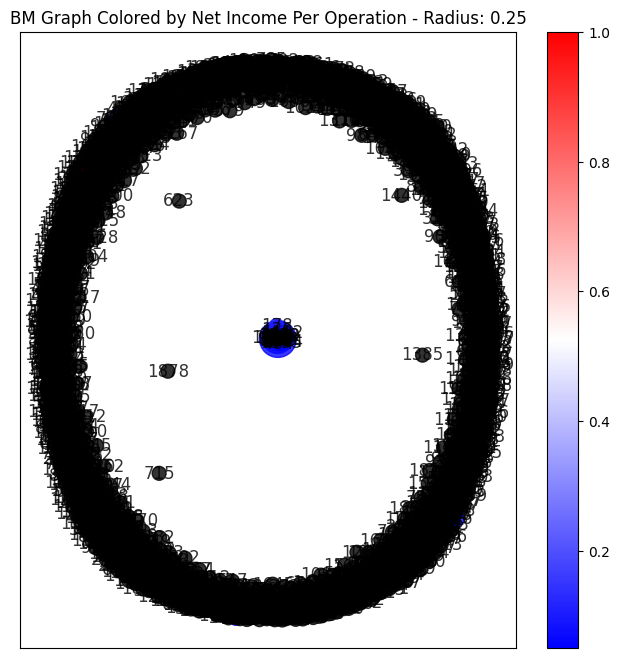

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


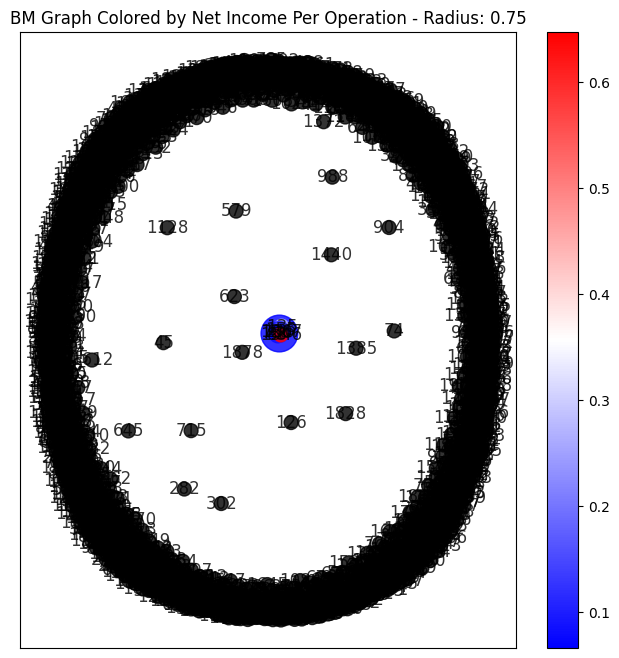

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


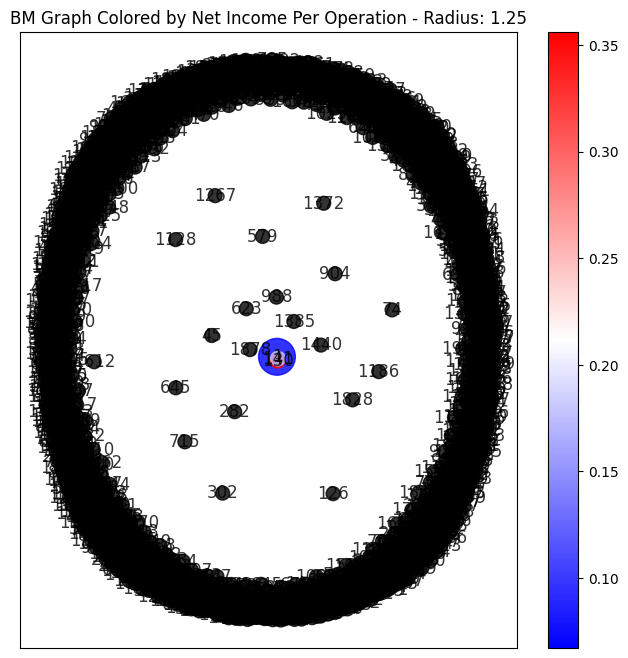

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


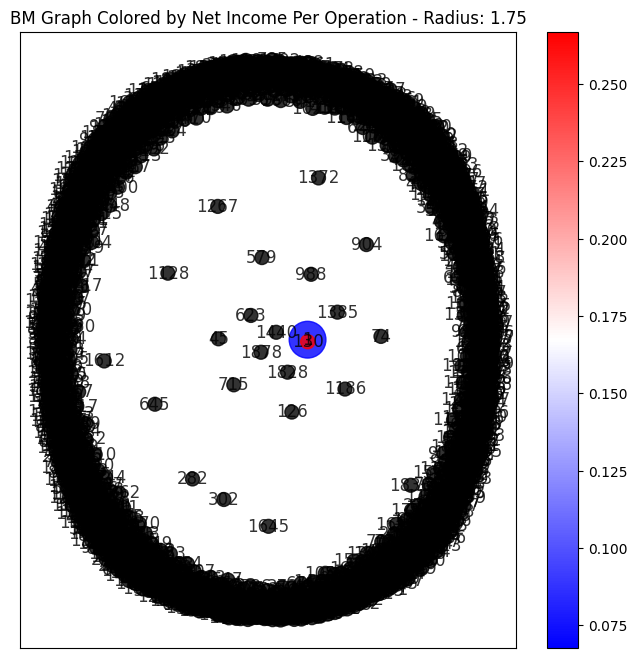

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


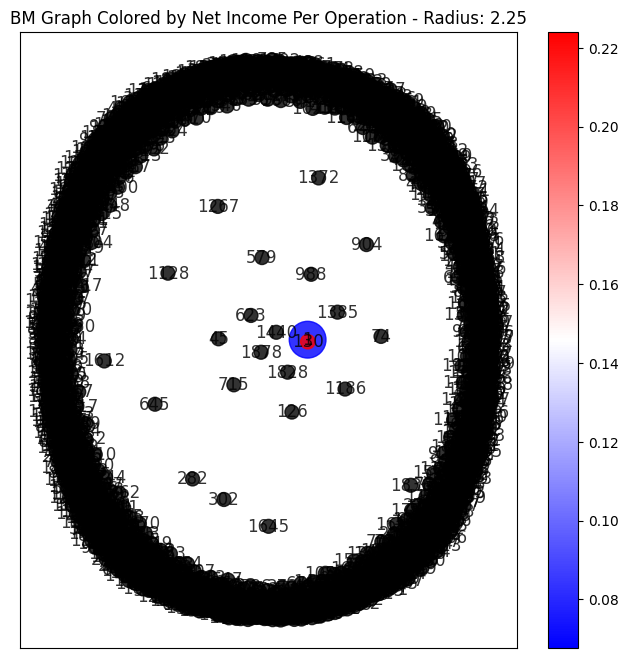

In [33]:
from matplotlib import colormaps as cm
import matplotlib.pyplot as plt

for radius in [0.25, 0.75, 1.25, 1.75, 2.25]: 
    bm = BallMapper(
        X=sub_norm.to_numpy(), eps=radius  # the pointcloud, as a numpy array
    )  # the radius of the balls

    # Coloring
    my_rainbow_palette = cm.get_cmap('bwr')

    plt.figure(figsize=(8,8))
    bm.add_coloring(coloring_df_norm)
    bm.draw_networkx(coloring_variable='netIncome$PerOp', color_palette=my_rainbow_palette, colorbar = True)
    plt.title("BM Graph Colored by Net Income Per Operation - Radius: " + str(radius))
    plt.show()
    plt.close()

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


color by variable netIncome$PerOp 
MIN_VALUE: 0.066, MAX_VALUE: 0.387


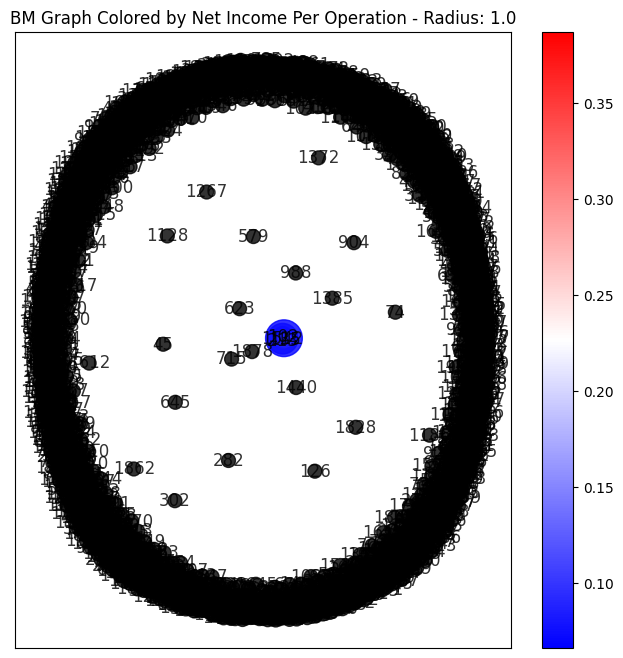

In [34]:
# Create Fancy GUI
radius = 1.0
bm = BallMapper(
    X=sub_norm.to_numpy(), eps=radius  # the pointcloud, as a numpy array
)  # the radius of the balls

# Coloring
my_rainbow_palette = cm.get_cmap('bwr')

plt.figure(figsize=(8,8))
bm.add_coloring(coloring_df_norm)
bm.draw_networkx(coloring_variable='netIncome$PerOp', color_palette=my_rainbow_palette, colorbar = True)
plt.title("BM Graph Colored by Net Income Per Operation - Radius: " + str(radius))
# plt.show()

# Create fancy GUI
from pyballmapper.plotting import graph_GUI
from bokeh.plotting import figure, show

bm.add_coloring(coloring_df_norm)
my_fancy_gui = graph_GUI(bm.Graph, my_rainbow_palette)
my_fancy_gui.color_by_variable('netIncome$PerOp')
show(my_fancy_gui.plot)

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


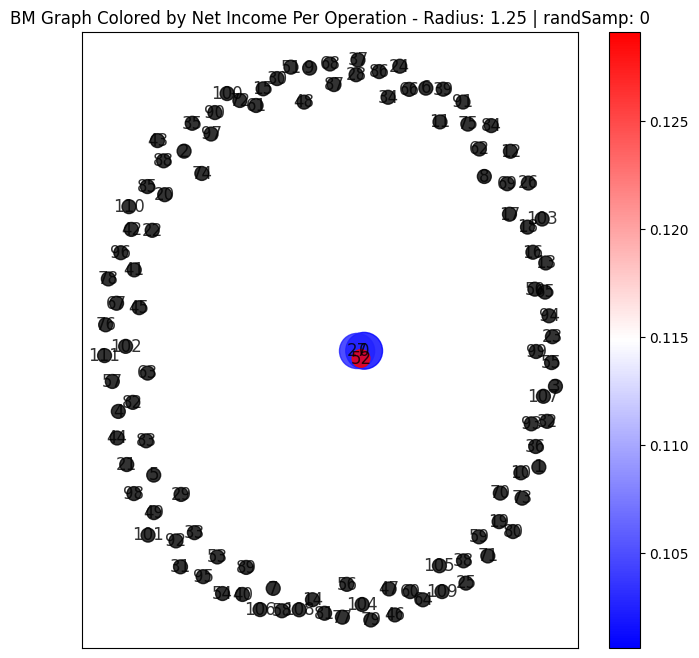

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


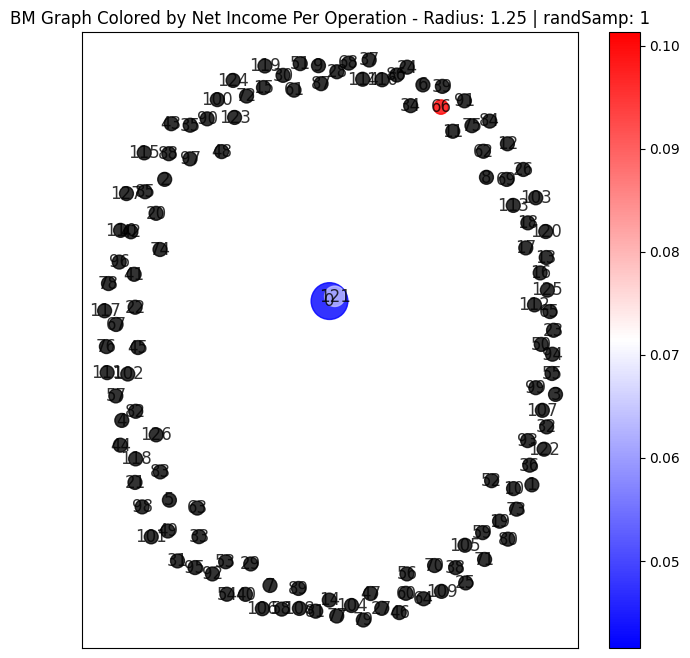

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


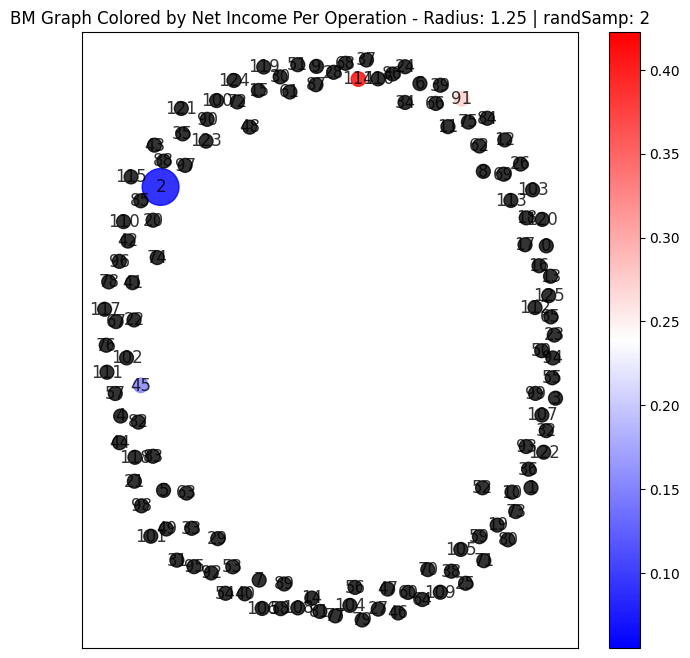

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


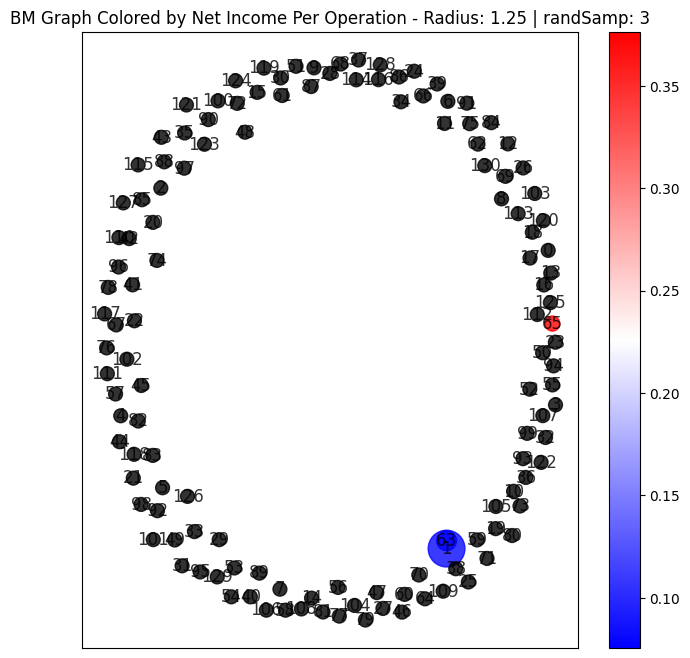

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


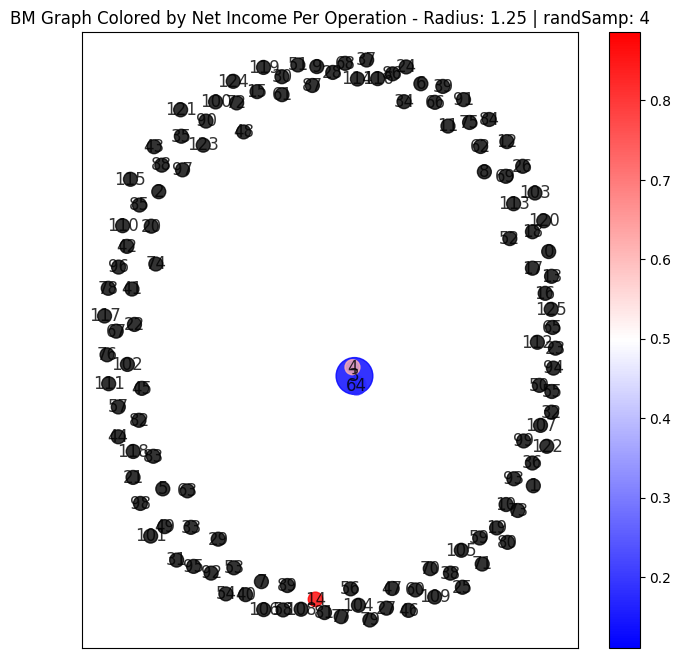

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


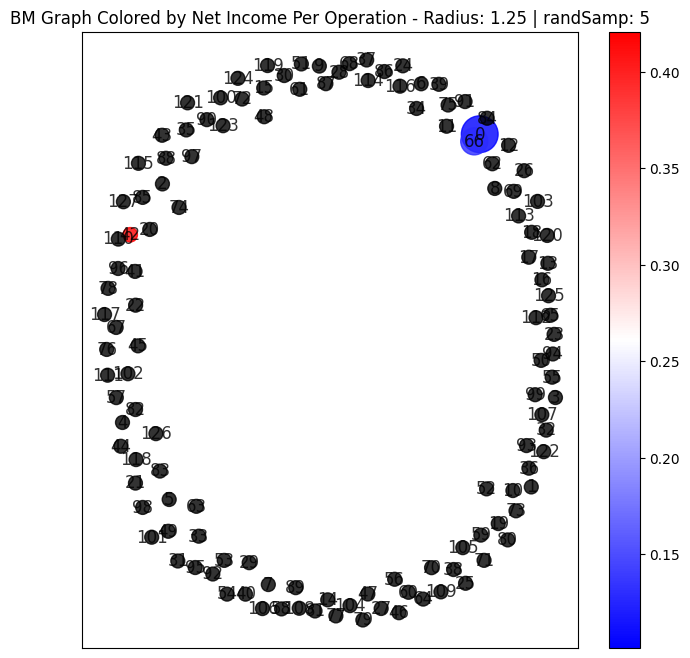

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


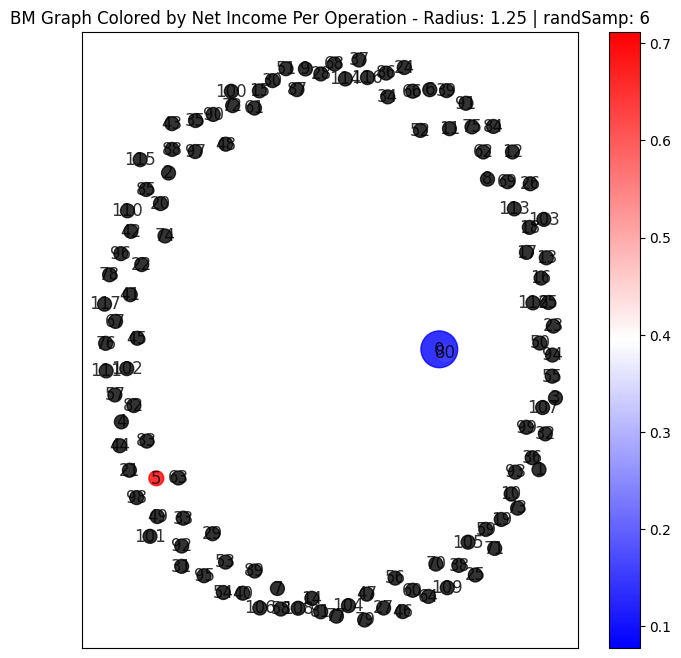

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


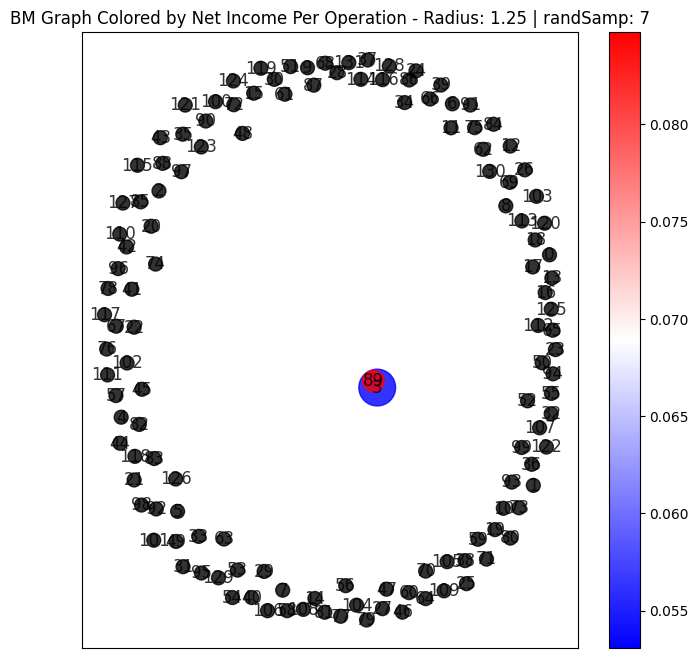

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


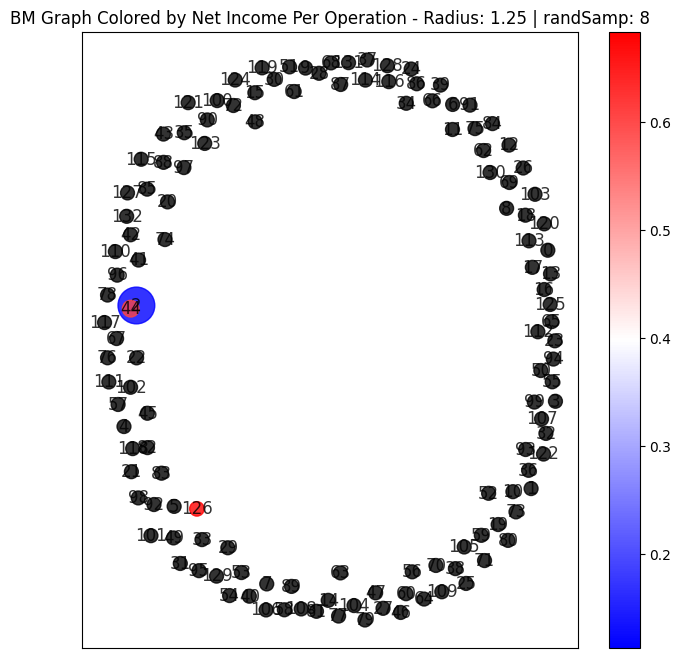

{}


c:\Users\cshul\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


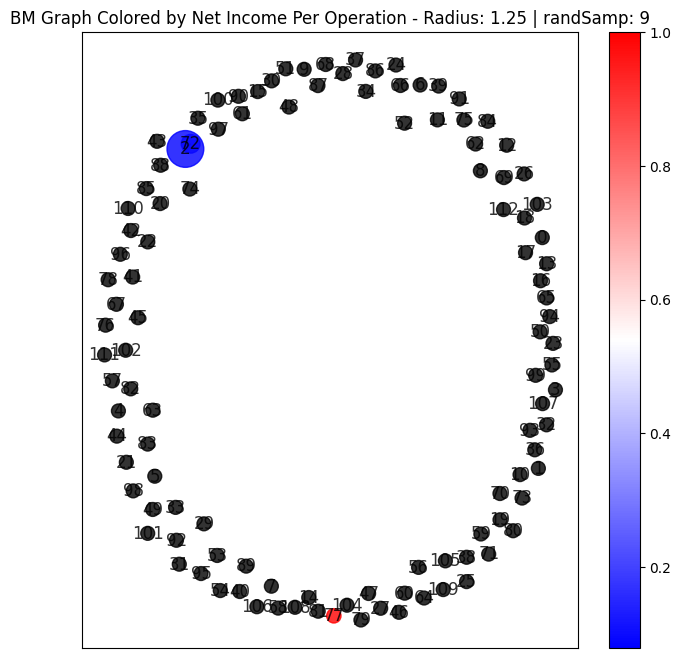

In [35]:
# Randomly Selected Subsets
from matplotlib import colormaps as cm
ct = 0 
while ct < 10: 
    sub = df.sample(n=200)
    keeps = list(sub.columns)[1:]
    sub = sub[keeps].copy(deep = True)
    scaler = MinMaxScaler()
    sub_norm = scaler.fit_transform(sub)
    sub_norm = pd.DataFrame(sub_norm, columns = sub.columns)

    # coloring
    coloring_subset = ['netIncome$PerOp', 'agLandAcres', 'numOperations']
    coloring_df_norm = sub_norm[coloring_subset].copy(deep = True)

    # Create bm
    radius = 1.25
    bm = BallMapper(
        X=sub_norm.to_numpy(), eps=radius  # the pointcloud, as a numpy array
    )  # the radius of the balls

    # Coloring
    my_rainbow_palette = cm.get_cmap('bwr')

    plt.figure(figsize=(8,8))
    bm.add_coloring(coloring_df_norm)
    bm.draw_networkx(coloring_variable='netIncome$PerOp', color_palette=my_rainbow_palette, colorbar = True)
    plt.title("BM Graph Colored by Net Income Per Operation - Radius: " + str(radius) + ' | randSamp: ' + str(ct))
    plt.show()
    plt.savefig('BM_Net_Income_Per_Op_Radius_' + str(radius) + '_ct_' + str(ct) + '.jpg')
    plt.close()
    ct += 1

